In [2]:
import pandas as pd
import numpy as np

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
kyphosis = pd.read_csv('kyphosis.csv')

In [7]:
kyphosis.head()

Kyphosis  Age  Number  Start
0   absent   71       3      5
1   absent  158       3     14
2  present  128       4      5
3   absent    2       5      1
4   absent    1       4     15

In [8]:
kyphosis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.6+ KB


In [9]:
kyphosis.describe()

Age     Number      Start
count   81.000000  81.000000  81.000000
mean    83.654321   4.049383  11.493827
std     58.104251   1.619423   4.883962
min      1.000000   2.000000   1.000000
25%     26.000000   3.000000   9.000000
50%     87.000000   4.000000  13.000000
75%    130.000000   5.000000  16.000000
max    206.000000  10.000000  18.000000

In [10]:
sns.pairplot(kyphosis)

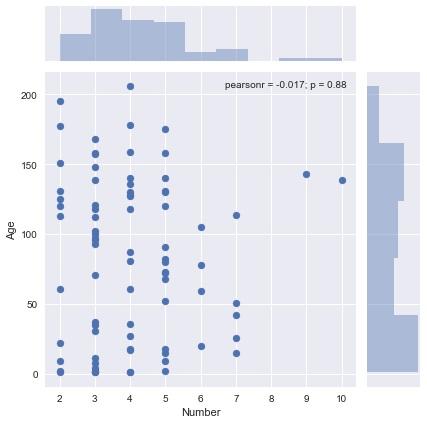

In [13]:
sns.jointplot(x='Number',y='Age',data=kyphosis)

#sns.jointplot(x='fico',y='int.rate',data=loans,color='purple')

In [16]:
dummy_data = ['Kyphosis']

In [21]:
final = pd.get_dummies(kyphosis, columns=dummy_data, drop_first=True)

In [22]:
final.head()

Age  Number  Start  Kyphosis_present
0   71       3      5                 0
1  158       3     14                 0
2  128       4      5                 1
3    2       5      1                 0
4    1       4     15                 0

In [23]:
from sklearn.cross_validation import train_test_split

In [24]:
X = final.drop(['Kyphosis_present'], axis = 1)

In [25]:
y = final['Kyphosis_present']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
Random_for = RandomForestClassifier(n_estimators=600)

In [36]:
Random_for.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=600, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [38]:
predictions = Random_for.predict(X_test)

In [40]:
from sklearn.metrics import classification_report, confusion_matrix

In [43]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.76      1.00      0.86        19
          1       1.00      0.25      0.40         8

avg / total       0.83      0.78      0.73        27



In [44]:
print(confusion_matrix(y_test, predictions))

[[19  0]
 [ 6  2]]
